In [53]:
# pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel

import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot

In [54]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [55]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


## EDA

In [56]:
# Medidas estatísticas das variaveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

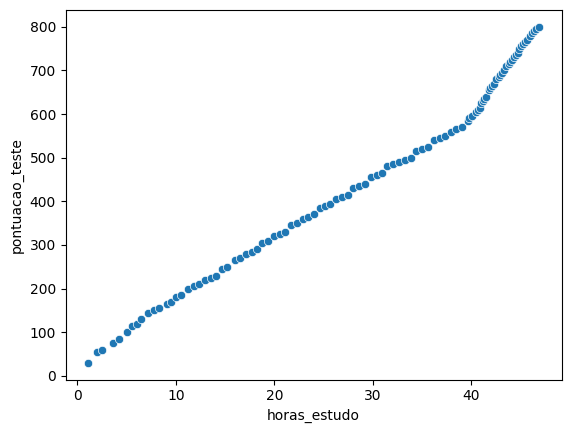

In [57]:
# Plot de dispersão
# X = horas_estudo
# y = pontuacao_teste

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

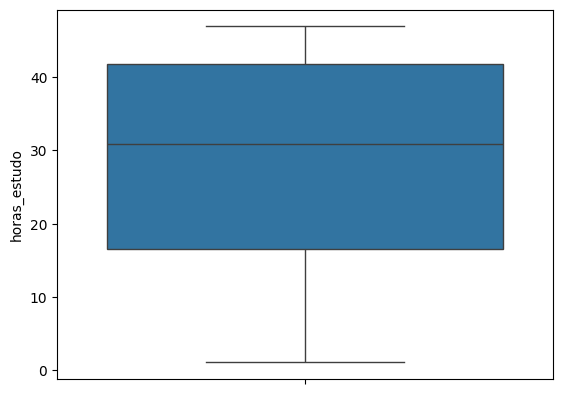

In [58]:
# Verificar se temos outliers
# Plot BoxPlot

sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

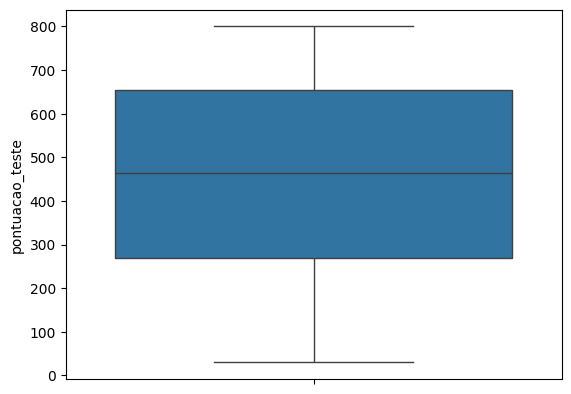

In [59]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

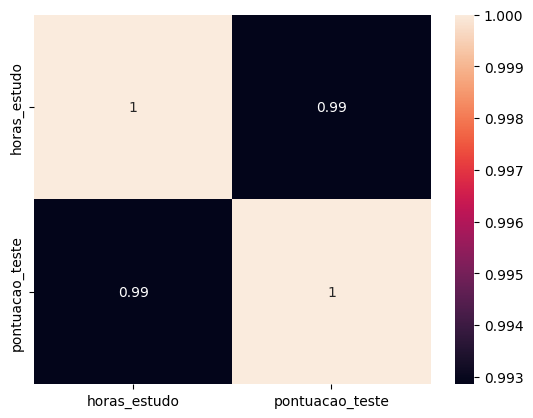

In [60]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

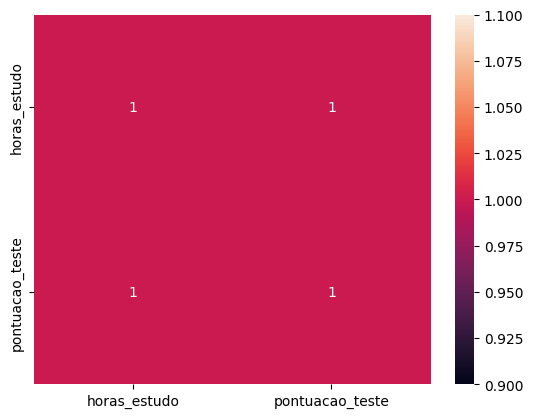

In [61]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

<Axes: xlabel='horas_estudo', ylabel='Count'>

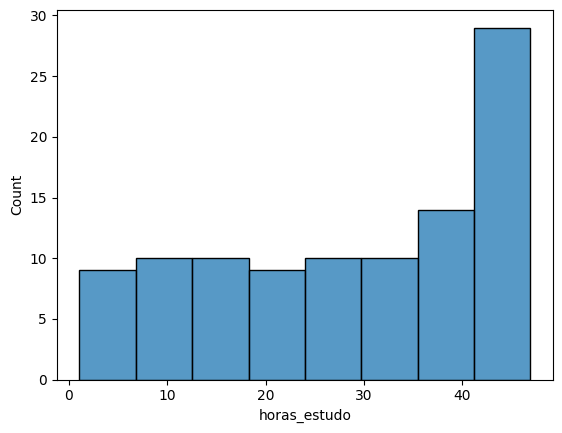

In [62]:
# Histograma das variaveis
sns.histplot(df_pontuacao, x='horas_estudo')


<Axes: xlabel='pontuacao_teste', ylabel='Count'>

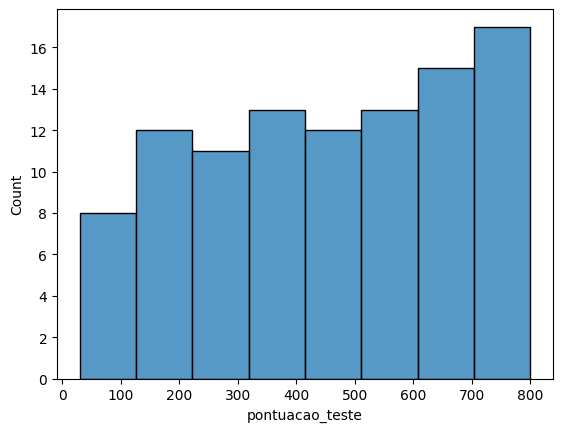

In [63]:
# Histograma das variaveis
sns.histplot(df_pontuacao, x='pontuacao_teste')

# Treinar Modelo

In [64]:
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1);
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)


In [65]:
reg_model = LinearRegression()

In [66]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [67]:
print("Equação da reta é: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Equação da reta é: y = 15.648444x + 8.068181


In [68]:
# Predicao dos valores com base no conjunto de testes

y_pred = reg_model.predict(X_test)

In [69]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela varíavel indepente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.989238918803925

In [70]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (y_test - y_pred)
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

np.float64(19.957546510279972)

In [71]:
# MSE (Mean Squared Error)
# MSE = Media (y_test - y_pred)2
# mais sensível a outliers e penaliza grandes error
mean_squared_error(y_test, y_pred)

np.float64(570.9738980496192)

In [72]:
# RMSE (Squared Root Mean Error)
# MSE = Raiz (Media (y_test - y_pred)2)
# mais sensível a outliers e penaliza grandes error
mean_squared_error(y_test, y_pred, squared=False)

/root/.local/share/virtualenvs/simple-linear-regression-zK0uyfkS/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(23.895060118141974)

<Axes: >

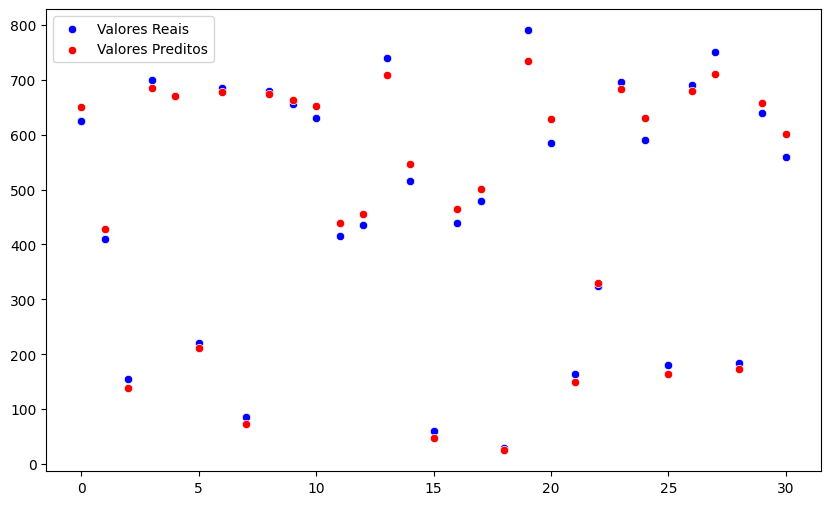

In [78]:
# Analise Gráfica
x_axis = range(len(y_test));
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label="Valores Reais")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label="Valores Preditos")

### Análise de Residuos

In [79]:
# Calcular residuos

residuos = y_test - y_pred

In [83]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrão

from scipy.stats import zscore
residuos_std = zscore(residuos);
 

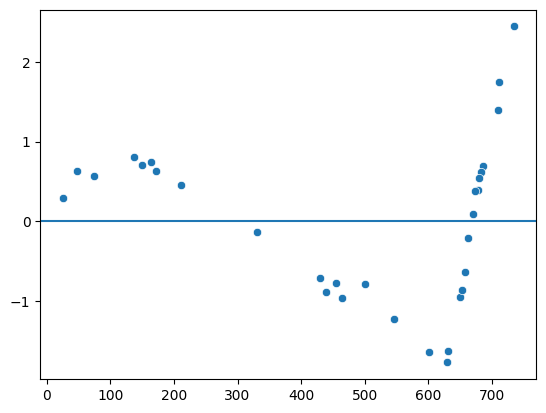

In [84]:
# Verificar linearidade do modelo:
# Se os resíduos estiver entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variancias (Homecedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário
# se tivermos alguma tendencia ou padrão (formam um cone, funil), há
# heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

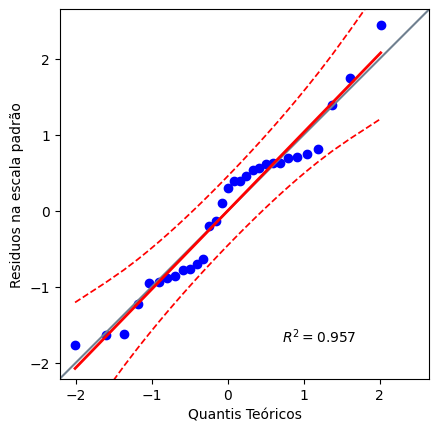

In [91]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-QUantile) Plot, que avalia de uma amostra segue um distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()


In [93]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrario rejeitamos

stat_shapiro, p_valor_shapiro =shapiro(residuos.reshape(-1));

print("Estatistica do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatistica do teste: 0.9554827698490795 e P-Valor: 0.22067037798559214


In [102]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrario rejeitamos

stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm');

print("Estatistica do teste: {} e P-Valor: {}".format(stat_ks, p_valor_ks))

Estatistica do teste: 0.5161278444860566 e P-Valor: 3.372770829934542e-08
